In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [60]:
data = pd.read_csv('thyroid_cancer_risk_data.csv')

In [36]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [14]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  6


,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
0,1,66,9.37,1.67,6.16,1.08
1,2,29,1.83,1.73,10.54,4.05
2,3,86,6.26,2.59,10.57,4.61
3,4,75,4.10,2.62,11.04,2.46
4,5,35,9.10,2.11,10.71,2.11


In [16]:
data.shape

(212691, 17)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

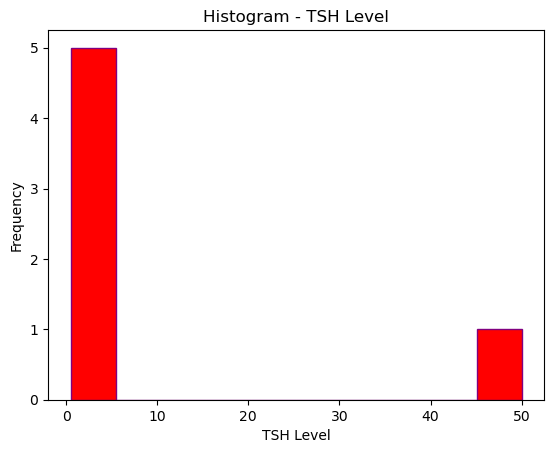

In [20]:


data = pd.DataFrame({'TSH_Level': [0.5, 0.7, 1.2, 1.8, 3.0, 50.0]})
plt.hist(data['TSH_Level'], bins=10, color='red', edgecolor='purple')
plt.title('Histogram - TSH Level')
plt.xlabel('TSH Level')
plt.ylabel('Frequency')
plt.show()             #checking outliers through histograms


In [232]:
# from sklearn.preprocessing import RobustScaler

# # Original DataFrame
# data = pd.DataFrame({'TSH_Level': [0.5, 0.7, 1.2, 1.8, 3.0, 50.0]})

# # Scaling
# scaler = RobustScaler()
# data['TSH_Level_Scaled'] = scaler.fit_transform(data[['TSH_Level']])

# # Plotting
# plt.hist(data['TSH_Level_Scaled'], bins=10, color='red', edgecolor='purple')
# plt.title('Histogram - TSH Level')
# plt.xlabel('TSH_Level_Scaled')
# plt.ylabel('Frequency')
# plt.show()


In [65]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Log Transformation
# data['TSH_Level_Log'] = np.log1p(data['TSH_Level'])

# # Plot the transformed data
# plt.hist(data['TSH_Level_Log'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Histogram - TSH Level (Log Transformed)')
# plt.xlabel('TSH_Level_Log')
# plt.ylabel('Frequency')
# plt.show()


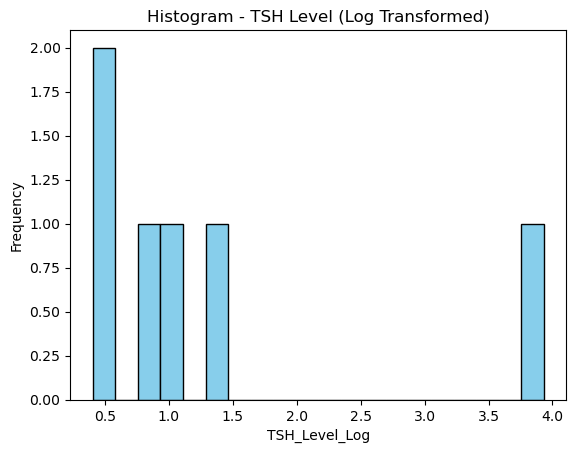

In [22]:

from sklearn.preprocessing import RobustScaler

# Sample Data
data = pd.DataFrame({'TSH_Level': [0.5, 0.7, 1.2, 1.8, 3.0, 50.0]})
data['TSH_Level_Log'] = np.log1p(data['TSH_Level'])

# Plot the transformed data
plt.hist(data['TSH_Level_Log'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram - TSH Level (Log Transformed)')
plt.xlabel('TSH_Level_Log')
plt.ylabel('Frequency')
plt.show()
#applying log transformation


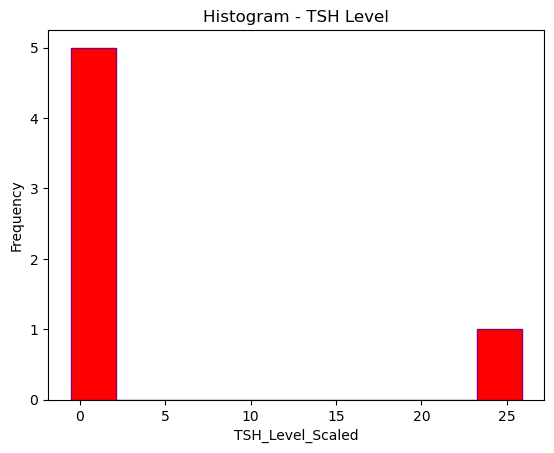

In [182]:
data = pd.DataFrame({'TSH_Level': [0.5, 0.7, 1.2, 1.8, 3.0, 50.0]})

# Scaling
scaler = RobustScaler()
data['TSH_Level_Scaled'] = scaler.fit_transform(data[['TSH_Level']])

# Plotting
plt.hist(data['TSH_Level_Scaled'], bins=10, color='red', edgecolor='purple')
plt.title('Histogram - TSH Level')
plt.xlabel('TSH_Level_Scaled')
plt.ylabel('Frequency')
plt.show()   #scaling to remove outlier

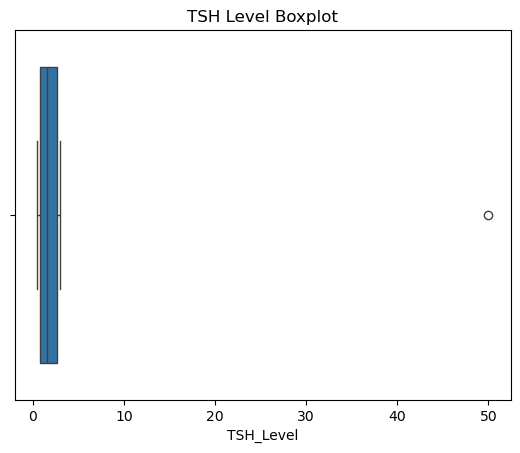

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='TSH_Level', data=data)
plt.title('TSH Level Boxplot')
plt.show()   #visualizing outlier through boxplot


In [78]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Scatter plot for TSH vs T3
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=data, x='TSH_Level', y='T3_Level', color='purple')
# plt.title('TSH vs T3 Levels')

# # Scatter plot for TSH vs T4
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=data, x='TSH_Level', y='T4_Level', color='green')
# plt.title('TSH vs T4 Levels')

# plt.tight_layout()
# plt.show()


In [26]:
Q1 = data['TSH_Level'].quantile(0.25)
Q3 = data['TSH_Level'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['TSH_Level'] >= Q1 - 1.5 * IQR) & 
                     (data['TSH_Level'] <= Q3 + 1.5 * IQR)].copy()  # `.copy()` ensures a fresh copy



print(data.shape)  # To confirm no columns are removed
print(data.head()) #removing outlier using IQR method

(6, 2)
   TSH_Level  TSH_Level_Log
0        0.5       0.405465
1        0.7       0.530628
2        1.2       0.788457
3        1.8       1.029619
4        3.0       1.386294


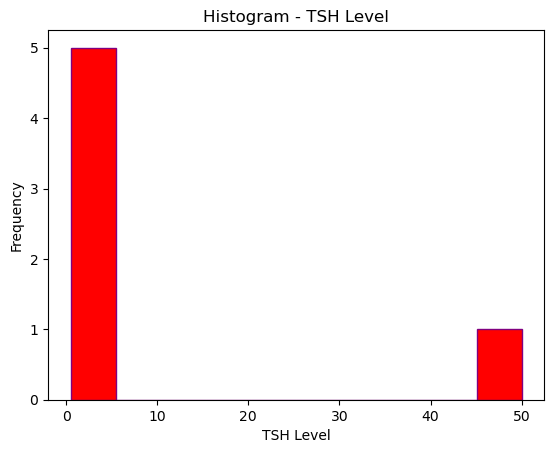

In [28]:

# data = pd.DataFrame({'TSH_Level': [0.5, 0.7, 1.2, 1.8, 3.0, 50.0]})
plt.hist(data['TSH_Level'], bins=10, color='red', edgecolor='purple')
plt.title('Histogram - TSH Level')
plt.xlabel('TSH Level')
plt.ylabel('Frequency')
plt.show()     #Historgrams for checking outlier


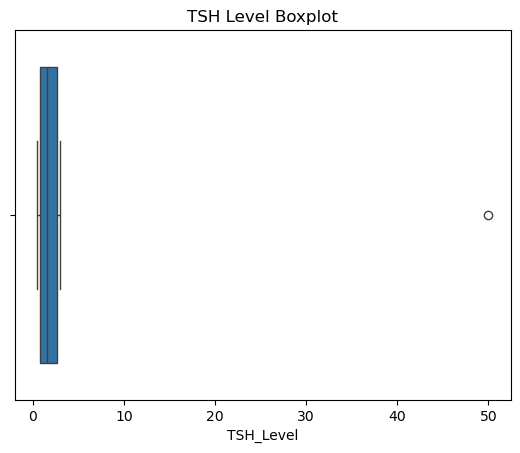

In [30]:

sns.boxplot(x='TSH_Level', data=data)
plt.title('TSH Level Boxplot')
plt.show() #Boxplot


In [38]:
print("Data type of 'Patient_ID':", data['Patient_ID'].dtype)
print("Data type of 'Nodule_Size':", data['Nodule_Size'].dtype)
print("Data type of 'T3_Level':", data['T3_Level'].dtype)
print("Data type of 'T4_Level':", data['T4_Level'].dtype)
print("Data type of 'TSH_Level':", data['TSH_Level'].dtype)
print("Data type of 'Diagnosis':", data['Diagnosis'].dtype)

Data type of 'Patient_ID': int64
Data type of 'Nodule_Size': float64
Data type of 'T3_Level': float64
Data type of 'T4_Level': float64
Data type of 'TSH_Level': float64
Data type of 'Diagnosis': object


In [40]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')


In [42]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  6


,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
0,1,66,9.37,1.67,6.16,1.08
1,2,29,1.83,1.73,10.54,4.05
2,3,86,6.26,2.59,10.57,4.61
3,4,75,4.10,2.62,11.04,2.46
4,5,35,9.10,2.11,10.71,2.11


In [250]:
# # Example dataset with 212,691 entries
# data = {'Diagnosis': ['Benign', 'Malignant'] * 106345 + ['Benign']}  # 212,691 rows
# df = pd.DataFrame(data)

# # Binary Encoding
# df['Diagnosis'] = df['Diagnosis'].map({'Benign': 0, 'Malignant': 1})

# print(df['Diagnosis'].value_counts())  # To verify the conversion
# print(df.head())


Diagnosis
0    106346
1    106345
Name: count, dtype: int64
   Diagnosis
0          0
1          1
2          0
3          1
4          0


In [140]:

# Example dataset with 212,691 entries
# data1 = {'Diagnosis': ['Benign', 'Malignant'] * 106345 + ['Benign']}  # 212,691 rows
# data_new = pd.DataFrame(data1)

# # Binary Encoding using .replace()
# data_new['Diagnosis_Encoded'] = data['Diagnosis'].map({'Benign': 0, 'Malignant': 1}).astype('int8')


# print(data_new['Diagnosis_Encoded'].value_counts())  # To verify the conversion
# print(data_new.head())


Diagnosis_Encoded
0    163196
1     49495
Name: count, dtype: int64
   Diagnosis  Diagnosis_Encoded
0     Benign                  0
1  Malignant                  0
2     Benign                  0
3  Malignant                  0
4     Benign                  0


In [62]:
import pandas as pd

# Assuming 'data' is your original DataFrame
data['Diagnosis_Encoded'] = (data['Diagnosis'] == 'Malignant').astype('int8')

# Drop the original 'Diagnosis' column
data.drop('Diagnosis', axis=1, inplace=True)

print(data.head())
print(data['Diagnosis_Encoded'].value_counts())# To verify the conversion
# To verify the conversion



   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk  Diagnosis_Encoded  
0      1.67      6.16         1.08                 Low          

In [288]:
data.head(20)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis_Encoded
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,0
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,0
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,0
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,0
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,0
5,6,89,Male,UK,African,No,No,No,Yes,Yes,No,4.00,0.98,5.52,0.02,Medium,0
6,7,89,Female,South Korea,Asian,Yes,Yes,No,No,Yes,No,4.70,0.62,11.73,0.01,High,1
7,8,38,Female,India,African,No,No,No,No,No,No,5.54,3.49,9.47,4.30,Medium,0
8,9,17,Female,Russia,African,No,Yes,No,No,No,Yes,2.30,2.60,11.89,0.81,High,1
9,10,36,Male,Germany,Asian,No,No,No,No,Yes,No,1.34,0.56,4.51,1.44,Low,0


C:\Users\Nazneen\AppData\Local\Temp\ipykernel_16252\2338336585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')


Text(0.5, 1.0, 'TSH_Level vs Diagnosis')

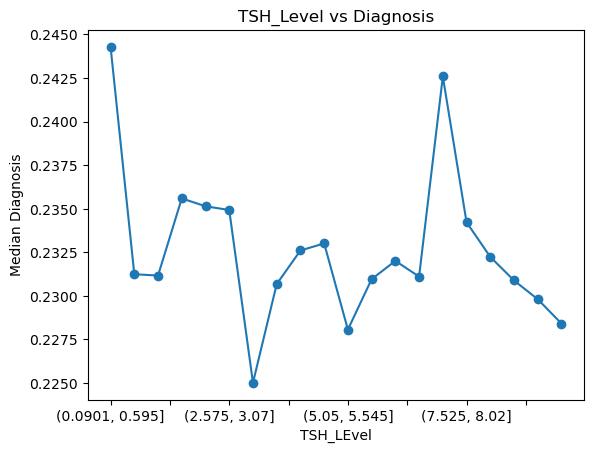

In [46]:
data['TSH_Bins'] = pd.cut(data['TSH_Level'], bins=20)
data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')



plt.xlabel('TSH_LEvel')
plt.ylabel('Median Diagnosis')
plt.title("TSH_Level vs Diagnosis") #Consider Aggregation with Bins for Clarity

C:\Users\Nazneen\AppData\Local\Temp\ipykernel_16252\2677758524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')


Text(0.5, 1.0, 'T3_Level vs Diagnosis')

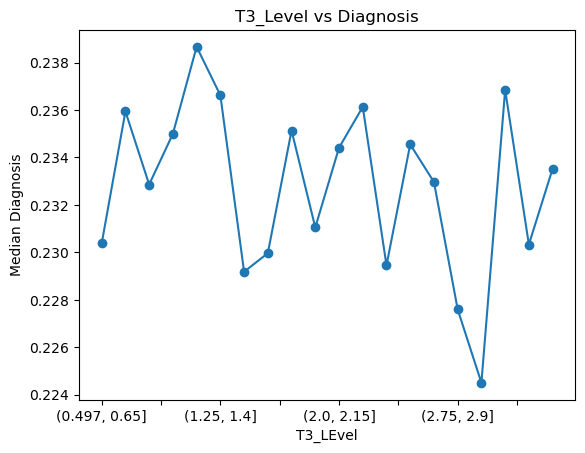

In [48]:
data['TSH_Bins'] = pd.cut(data['T3_Level'], bins=20)
data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')
plt.xlabel('T3_LEvel')
plt.ylabel('Median Diagnosis')
plt.title("T3_Level vs Diagnosis")

C:\Users\Nazneen\AppData\Local\Temp\ipykernel_16252\2014623819.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')


Text(0.5, 1.0, 'T4_Level vs Diagnosis')

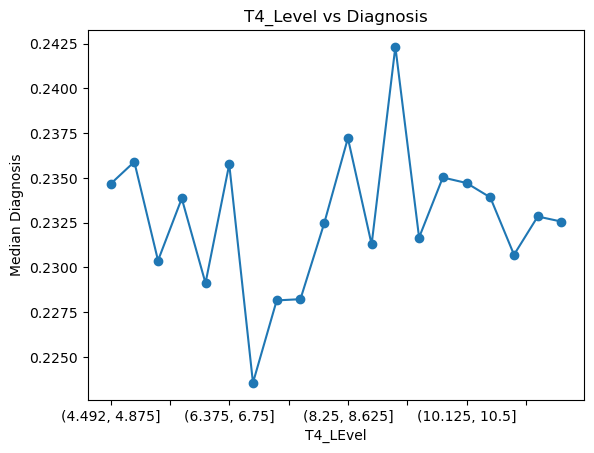

In [50]:
data['TSH_Bins'] = pd.cut(data['T4_Level'], bins=20)
data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')
plt.xlabel('T4_LEvel')
plt.ylabel('Median Diagnosis')
plt.title("T4_Level vs Diagnosis")

C:\Users\Nazneen\AppData\Local\Temp\ipykernel_16252\3311100278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')


Text(0.5, 1.0, 'Age vs Diagnosis')

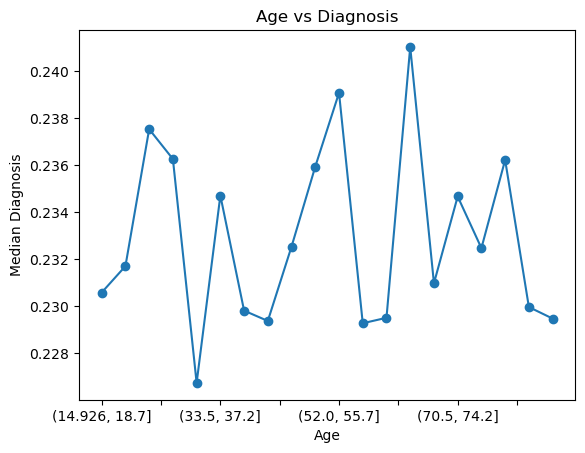

In [52]:
data['TSH_Bins'] = pd.cut(data['Age'], bins=20)
data.groupby('TSH_Bins')['Diagnosis_Encoded'].mean().plot(marker='o')
plt.xlabel('Age')
plt.ylabel('Median Diagnosis')
plt.title("Age vs Diagnosis")

In [64]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Country', 'Ethnicity'])

<IPython.core.display.Javascript object>

In [56]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Added use_label_encoder=False to avoid warnings
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select important features
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()
X_train = X_train[selected_features]
X_test = X_test[selected_features]

NameError: name 'X_train' is not defined

In [212]:
# from sklearn.preprocessing import OrdinalEncoder


# data = pd.DataFrame({'Thyroid_Cancer_Risk': ['Low', 'Medium', 'High', 'Low', 'High']})

# encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
# data['Thyroid_Cancer_Risk_Encoded'] = encoder.fit_transform(data[['Thyroid_Cancer_Risk']])

# print(data.head())


  Thyroid_Cancer_Risk  Thyroid_Cancer_Risk_Encoded
0                 Low                          0.0
1              Medium                          1.0
2                High                          2.0
3                 Low                          0.0
4                High                          2.0


In [214]:
# from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd

# # Sample data
# data = pd.DataFrame({'Thyroid_Risk': ['Low', 'Medium', 'High', 'Low', 'High']})

# # Ordinal Encoding
# encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
# data['Thyroid_Risk_Encoded'] = encoder.fit_transform(data[['Thyroid_Risk']]).astype(int)

# print(data.head())
# print(data['Thyroid_Risk_Encoded'].value_counts())  # To verify the conversion   #removing every columns and altering whole dataset


In [66]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Sample data structure (for reference)
# Assuming 'data' is your original DataFrame with 15+ columns
# 'Thyroid_Risk' is one of the columns

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
data['Thyroid__Cancer_Risk_Encoded'] = encoder.fit_transform(data[['Thyroid_Cancer_Risk']]).astype(int)

# Drop the original 'Thyroid_Risk' column
data.drop('Thyroid_Cancer_Risk', axis=1, inplace=True)

print(data.head())


   Patient_ID  Age  Gender Family_History Radiation_Exposure  \
0           1   66       1             No                Yes   
1           2   29       1             No                Yes   
2           3   86       1             No                 No   
3           4   75       0             No                 No   
4           5   35       0            Yes                Yes   

  Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  ...  Country_Russia  \
0                No      No      No       No       9.37  ...            True   
1                No      No      No       No       1.83  ...           False   
2                No      No      No       No       6.26  ...           False   
3                No      No      No       No       4.10  ...           False   
4                No      No      No       No       9.10  ...           False   

   Country_South Korea  Country_UK  Country_USA  Ethnicity_African  \
0                False       False        False              Fal

In [70]:


# # Assuming 'data' is your original DataFrame
# data['Diagnosis_Encoded'] = (data['Diagnosis'] == 'Malignant').astype('int8')

# # Drop the original 'Diagnosis' column
# data.drop('Diagnosis', axis=1, inplace=True)

# print(data.head())
# print(data['Diagnosis_Encoded'].value_counts())# To verify the conversion
# # To verify the conversion


In [68]:
data.head()

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern,Thyroid__Cancer_Risk_Encoded
0,1,66,1,No,Yes,No,No,No,No,9.37,...,True,False,False,False,False,False,True,False,False,0
1,2,29,1,No,Yes,No,No,No,No,1.83,...,False,False,False,False,False,False,False,True,False,0
2,3,86,1,No,No,No,No,No,No,6.26,...,False,False,False,False,False,False,True,False,False,0
3,4,75,0,No,No,No,No,No,No,4.10,...,False,False,False,False,False,True,False,False,False,1
4,5,35,0,Yes,Yes,No,No,No,No,9.10,...,False,False,False,False,True,False,False,False,False,2


In [72]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']])
data[['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']] = scaled_features

<IPython.core.display.Javascript object>

In [74]:

data['Family_History'] = data['Family_History'].map({'No': 0, 'Yes': 1}).astype('int8')
data['Radiation_Exposure'] = data['Radiation_Exposure'].map({'No': 0, 'Yes': 1}).astype('int8')
data['Iodine_Deficiency'] = data['Iodine_Deficiency'].map({'No': 0, 'Yes': 1}).astype('int8')
data['Smoking'] = data['Smoking'].map({'No': 0, 'Yes': 1}).astype('int8')
data['Obesity'] = data['Obesity'].map({'No': 0, 'Yes': 1}).astype('int8')
data['Diabetes'] = data['Diabetes'].map({'No': 0, 'Yes': 1}).astype('int8')

print(data['Family_History'].value_counts())  # To verify the conversion
print(data['Radiation_Exposure'].value_counts())  # To verify the conversion
print(data['Iodine_Deficiency'].value_counts())  # To verify the conversion
print(data['Smoking'].value_counts())  # To verify the conversion
print(data['Obesity'].value_counts())  # To verify the conversion
print(data['Diabetes'].value_counts())  # To verify the conversion
print(data.head())

Family_History
0    148866
1     63825
Name: count, dtype: int64
Radiation_Exposure
0    180831
1     31860
Name: count, dtype: int64
Iodine_Deficiency
0    159673
1     53018
Name: count, dtype: int64
Smoking
0    170260
1     42431
Name: count, dtype: int64
Obesity
0    148805
1     63886
Name: count, dtype: int64
Diabetes
0    170098
1     42593
Name: count, dtype: int64
   Patient_ID       Age  Gender  Family_History  Radiation_Exposure  \
0           1  0.650934       1               0                   1   
1           2 -1.059435       1               0                   1   
2           3  1.575458       1               0                   0   
3           4  1.066970       0               0                   0   
4           5 -0.782077       0               1                   1   

   Iodine_Deficiency  Smoking  Obesity  Diabetes  TSH_Level  ...  \
0                  0        0        0         0   1.512066  ...   
1                  0        0        0         0  -1.124060 

In [76]:
# data['Family_History'] = data['Family_History'].astype(str).str.strip().map({'Yes': 1, 'No': 0})


# data['Radiation_Exposure'] = data['Radiation_Exposure'].map({'Yes': 1, 'No': 0})
# data['Iodine_Deficiency	'] = data['Iodine_Deficiency'].map({'Yes': 1, 'No': 0})
# data['Smoking'] = data['Smoking'].map({'Yes': 1, 'No': 0})
# data['Obesity'] = data['Obesity'].map({'Yes': 1, 'No': 0})
# data['Diabetes'] = data['Diabetes'].map({'Yes': 1, 'No': 0})


In [78]:
data.head()


,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_African,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern,Thyroid__Cancer_Risk_Encoded
0,1,0.650934,1,0,1,0,0,0,0,1.512066,...,True,False,False,False,False,False,True,False,False,0
1,2,-1.059435,1,0,1,0,0,0,0,-1.124060,...,False,False,False,False,False,False,False,True,False,0
2,3,1.575458,1,0,0,0,0,0,0,0.424751,...,False,False,False,False,False,False,True,False,False,0
3,4,1.066970,0,0,0,0,0,0,0,-0.330426,...,False,False,False,False,False,True,False,False,False,1
4,5,-0.782077,0,1,1,0,0,0,0,1.417669,...,False,False,False,False,True,False,False,False,False,2


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Feature importance plot
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.show()


NameError: name 'X_train' is not defined

In [82]:
low_importance_features = importance_df[importance_df['Importance'] < 0.01]['Feature'].tolist()
X_train_reduced = X_train.drop(low_importance_features, axis=1)
X_test_reduced = X_test.drop(low_importance_features, axis=1)

NameError: name 'importance_df' is not defined

In [306]:
X = data.drop(['Diagnosis_Encoded'], axis=1)
y = data['Diagnosis_Encoded']  # Target variable for predicting thyroid cancer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<IPython.core.display.Javascript object>

In [178]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)   #train the data

RandomForestClassifier(random_state=42)

In [310]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 453.5 kB/s eta 0:05:30
   ---------------------------------------- 0.5/150.0 MB 453.5 kB/s eta 0:05:30
   ---------------------------------------- 0.5/150.0 MB 453.5 kB/s eta 0:05:30
   ---------------------------------------- 0.8/150.0 MB 441.7 kB/s eta 0:05:38
   ---------------------------------------- 0.8/150.0 MB 441.7 kB/s eta 0:05:38
   ---------------------------------------- 1.0/150.0 MB 474.9 kB/s eta 0:05:14
   ---------------------------------------- 1.3/150.0 MB 564.1 kB/s eta 0:04:24
   -----------

In [312]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\Nazneen\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:12:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [314]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = xgb_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     48969
           1       0.69      0.44      0.54     14839

    accuracy                           0.82     63808
   macro avg       0.77      0.69      0.72     63808
weighted avg       0.81      0.82      0.81     63808



In [180]:
# from sklearn.metrics import accuracy_score, classification_report

# y_pred = rf_model.predict(X_test)
# print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
# print(classification_report(y_test, y_pred))     #calculating accuracy from random forest classifier

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     48969
           1       0.69      0.44      0.54     14839

    accuracy                           0.83     63808
   macro avg       0.77      0.69      0.72     63808
weighted avg       0.81      0.83      0.81     63808



In [320]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 3]  # Balances the class weights
}
grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2}


In [322]:
final_model = grid_search.best_estimator_
y_final_pred = final_model.predict(X_test)
print(f'Final Accuracy: {accuracy_score(y_test, y_final_pred):.2f}')

Final Accuracy: 0.83


In [94]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Correct dataset with matching lengths
# data = {
#     'TSH_Level': [0.5, 1.2, 2.1, 4.5, 5.0, 6.8] * 35448 + [0.5, 1.2, 2.1],  # Matching length
#     'Diagnosis': ['Benign', 'Malignant'] * 106345 + ['Benign']  # 212,691 entries
# }

# # Convert dictionary to DataFrame
# df = pd.DataFrame(data)

# # Binary Encoding
# df['Diagnosis'] = df['Diagnosis'].map({'Benign': 0, 'Malignant': 1})

# # Group and plot
# df.groupby('TSH_Level')['Diagnosis'].median().plot()

# plt.xlabel('TSH_Level')
# plt.ylabel('Diagnosis (0 = Benign, 1 = Malignant)')
# plt.title("TSH_Level vs Diagnosis")
# plt.show()
# #shows artificially generated data

In [96]:
# # list of numerical variables
# numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

# print('Number of numerical variables: ', len(numerical_features))

# # visualise the numerical variables
# data[numerical_features].head()

In [98]:
# T_feature = [feature for feature in numerical_features if 'T' in feature or 'TS' in feature]

# T_feature

In [100]:






# # Encode Categorical Variables (e.g., Gender)
# data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# # Normalize Hormone Levels
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data[['TSH_Level', 'T3_Level', 'T4_Level']] = scaler.fit_transform(data[['TSH_Level', 'T3_Level', 'T4_Level']])
